In [243]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def get_pickle_data(path:str, data_set_name:str):
    p_data_dict = {}
    sea_mammals = ['dolphin', 'otter', 'seal', 'orca']

    for idx in range(len(sea_mammals)):

        dictionary_name = 'data_dict_' + (sea_mammals[idx])[0:3]
        pickle_file_name = sea_mammals[idx] + '_' + data_set_name

        with open(path + pickle_file_name, "rb") as f:
            dictionary_name = pickle.load(f)
        p_data_dict[idx] = (dictionary_name)

    # Get filter number

    filter_number = str(p_data_dict[0].keys())
    filter_number = filter_number.split('=')
    filter_number = filter_number[1].split('\'')
    filter_number = int(filter_number[0])
    filter_number = b'IA=%d' % filter_number

    return p_data_dict, filter_number

def open_pkl_data(file_name:str):
    with open(file_name, "rb") as f:
        return pickle.load(f)
    
def pkl_data(data_dict:dict, file_name:str):
    with open(file_name, "wb") as f:
        pickle.dump(data_dict, f)

def reformat_dict(old_dict:dict, filter_num:bytes, idx:int):
    p_arr = old_dict[idx][filter_num]['pressures']
    time_arr = old_dict[idx][filter_num]['times']
    
    new_dict = {}
    new_dict = {'pressures':p_arr, 'times':time_arr}

    return new_dict

def time_series(data_dict):
    stations = []
    plt.figure(figsize=(15, 10))
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    
    for key in data_dict['data'].keys():
        p_arr = data_dict['data'][key]['pressures']
        time_arr = data_dict['data'][key]['times']

        stations.append(key)

        plt.plot(time_arr, (np.array(p_arr) - np.mean(p_arr)))

    filter_num = str(data_dict['specifications']['filter'])
    time_unit = str(data_dict['specifications']['units']['times'])
    pressure_unit = str(data_dict['specifications']['units']['pressures'])

    plt.title('Pressure Responses %s' % filter_num, fontsize=40)
    plt.xlabel('Time (%s)' % time_unit, fontsize=40)
    plt.ylabel('Pressure (%s)' % pressure_unit, fontsize=40)
    plt.legend(stations,
        bbox_to_anchor=(1.125, 1.0),
        loc='upper right', fontsize=20)

In [224]:
#Given by the user
path = '/Users/namsonnguyen/OneDrive/Pressures/filter5/Field_Experiments/'
file = 'jul25_field_boom.pkl'
#file = 'aug10_semifield.pkl'
my_dict, filter_num = get_pickle_data(path, file)

# Must be given by user
station_names = ['dol', 'ott', 'orc', 'sea']
pressure_units = 'bar'
time_units = 'sec'

data_dict = {}
new_dict = {}
new_dict['specifications'] = {'filter':filter_num, 'units':{'pressures':pressure_units, 'times':time_units}}

for idx in range(len(station_names)):

    reformatted_dict = reformat_dict(my_dict, filter_num, idx)

    #verify_dict(reformatted_dict, station_names[idx])

    data_dict[station_names[idx]] = reformatted_dict
    new_dict['data'] = data_dict


file_name = '/Users/namsonnguyen/Desktop/' + 'test_reformated.pkl'
pkl_data(new_dict, file_name)

dict_keys(['pressures', 'times'])


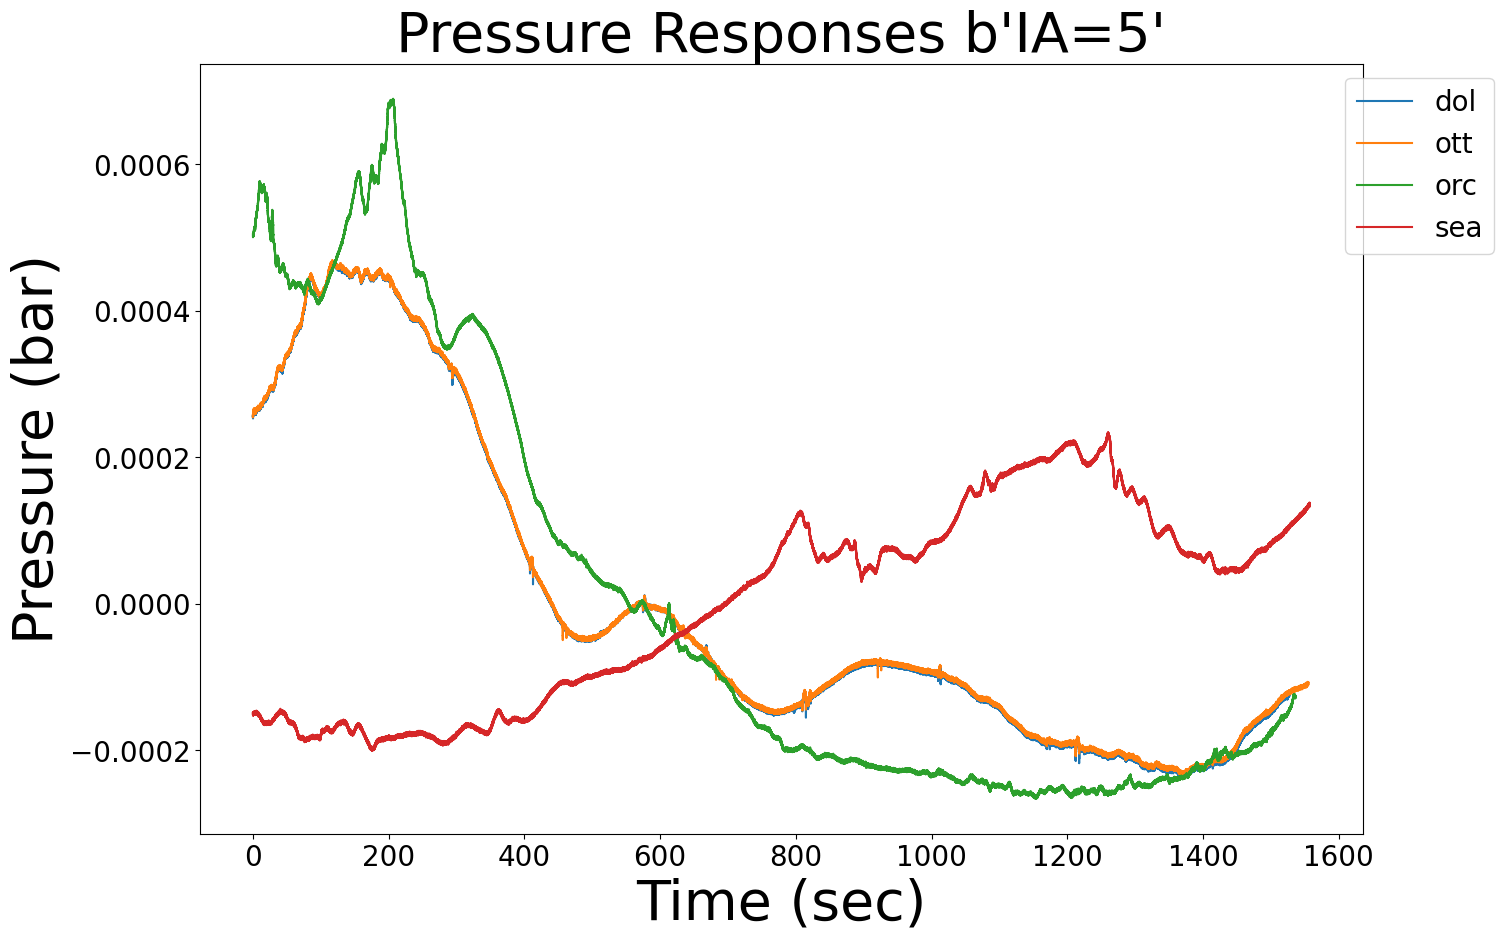

In [244]:
file_name = '/Users/namsonnguyen/Desktop/' + 'test_reformated.pkl'
pls_work = open_pkl_data(file_name)

print(pls_work['data']['dol'].keys())

time_series(pls_work)